In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
pd.options.display.max_colwidth = 200

In [2]:
df = pd.read_csv("../data/raw/train.csv")

In [3]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0


In [4]:
df.shape

(404290, 6)

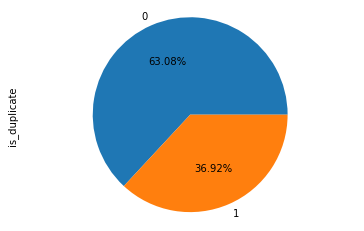

In [5]:
df.is_duplicate.value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.axis('equal')
plt.show()

In [6]:
df_all_question = pd.DataFrame(pd.concat([df.question1, df.question2])).reset_index(drop=True)
df_all_question.columns = ['questions']

In [7]:
df_all_question['word_count'] = df_all_question['questions'].apply(lambda x : len(str(x).split()))
df_all_question['character_count'] = df_all_question['questions'].apply(lambda x : len(str(x)))

In [8]:
df_all_question.head()

,questions,word_count,character_count
0,What is the step by step guide to invest in share market in india?,14,66
1,What is the story of Kohinoor (Koh-i-Noor) Diamond?,8,51
2,How can I increase the speed of my internet connection while using a VPN?,14,73
3,Why am I mentally very lonely? How can I solve it?,11,50
4,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",13,76


In [9]:
word_distribution = df_all_question['word_count'].value_counts()
character_distribution = df_all_question['character_count'].value_counts()

In [10]:
print(df_all_question.word_count.max())
print(df_all_question.word_count.min())
print(df_all_question.character_count.max())
print(df_all_question.character_count.min())
print(df_all_question.word_count.mean())
print(df_all_question.character_count.mean())


237
1
1169
1
11.062100225085953
59.82254817086745


In [11]:
df_all_question[df_all_question.character_count ==9]

,questions,word_count,character_count
63278,How long?,2,9
91373,How I am?,3,9
93813,Who Am I?,3,9
182943,[removed],1,9
189296,Am I fat?,3,9
209110,Easy PHP?,2,9
253902,Yf v. B.?,3,9
420769,Big data?,2,9
597536,[removed],1,9


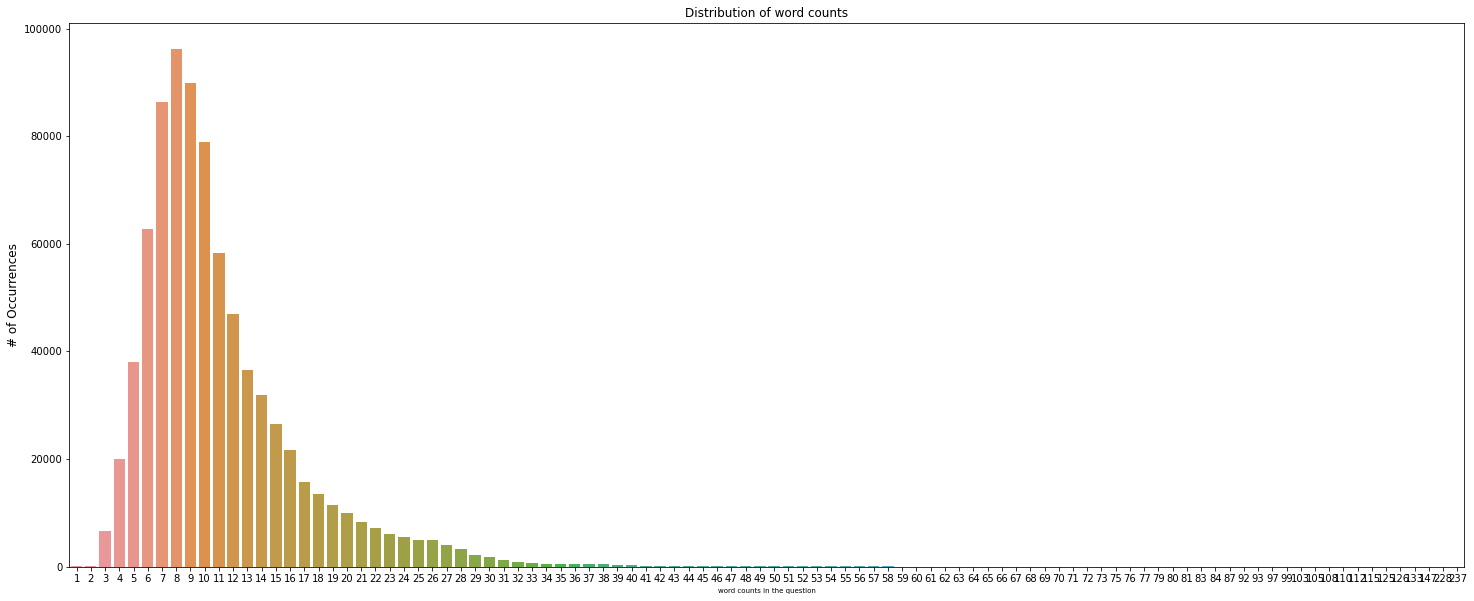

In [12]:
plt.subplots(figsize = (25,10))
sns.barplot(x = word_distribution.index, y = word_distribution.values)
plt.title('Distribution of word counts')
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('word counts in the question', fontsize=7)
plt.show()

In [13]:
aaa = np.arange(0,1200,50)
aaa

array([   0,   50,  100,  150,  200,  250,  300,  350,  400,  450,  500,
        550,  600,  650,  700,  750,  800,  850,  900,  950, 1000, 1050,
       1100, 1150])

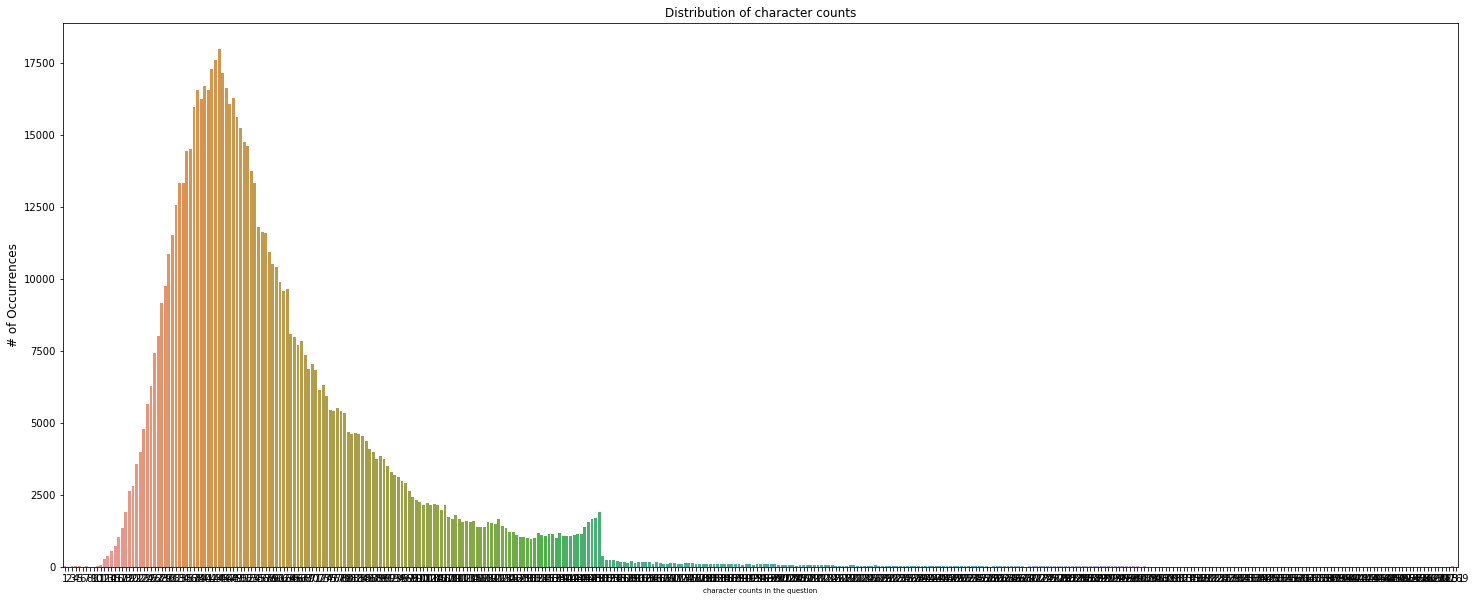

In [14]:
fig,ax = plt.subplots(figsize = (25,10))
sns.barplot(x = character_distribution.index, y = character_distribution.values, ax=ax)

# ax.set_xticks(character_distribution.index) # <--- set the ticks first
# ax.set_xticklabels(np.arange(min(character_distribution.index), max(character_distribution.index)+1, 100))
plt.title('Distribution of character counts')
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('character counts in the question', fontsize=7)
# plt.xticks(np.arange(min(character_distribution.index), max(character_distribution.index)+1, 100))
plt.show()

In [15]:
df_clean = df[(df.question1.str.len() >9) & (df.question2.str.len() >9)]

In [16]:
import nltk
from nltk import word_tokenize, ngrams
from nltk.corpus import stopwords

In [17]:
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\s\W',' ',s)
    s = re.sub('\W,\s',' ',s)
    s = re.sub(r'[^\w]', ' ', s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!@#$_\?]', '', s)
    s = s.replace("co","")
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    s = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", s)
    s = re.sub(r"what's", "what is ", s)
    s = re.sub(r"\'s", " ", s)
    s = re.sub(r"\'ve", " have ", s)
    s = re.sub(r"can't", "cannot ", s)
    s = re.sub(r"n't", " not ", s)
    s = re.sub(r"i'm", "i am ", s)
    s = re.sub(r"\'re", " are ", s)
    s = re.sub(r"\'d", " would ", s)
    s = re.sub(r"\'ll", " will ", s)
    s = re.sub(r",", " ", s)
    s = re.sub(r"\.", " ", s)
    s = re.sub(r"!", " ! ", s)
    s = re.sub(r"\/", " ", s)
    s = re.sub(r"\^", " ^ ", s)
    s = re.sub(r"\+", " + ", s)
    s = re.sub(r"\-", " - ", s)
    s = re.sub(r"\=", " = ", s)
    s = re.sub(r"'", " ", s)
    s = re.sub(r"(\d+)(k)", r"\g<1>000", s)
    s = re.sub(r":", " : ", s)
    s = re.sub(r" e g ", " eg ", s)
    s = re.sub(r" b g ", " bg ", s)
    s = re.sub(r" u s ", " american ", s)
    s = re.sub(r"\0s", "0", s)
    s = re.sub(r" 9 11 ", "911", s)
    s = re.sub(r"e - mail", "email", s)
    s = re.sub(r"j k", "jk", s)
    s = re.sub(r"\s{2,}", " ", s)
    s = re.sub(r"what's", "", s)
    s = re.sub(r"\'s", " ", s)
    s = re.sub(r"\'ve", " have ", s)
    s = re.sub(r"can't", "cannot ", s)
    s = re.sub(r"n't", " not ", s)
    s = re.sub(r" m ", " am ", s)
    s = re.sub(r"\'re", " are ", s)
    s = re.sub(r"\'d", " would ", s)
    s = re.sub(r"60k", " 60000 ", s)
    s = re.sub(r"\0s", "0", s)
    s = re.sub(r"e-mail", "email", s)
    s = re.sub(r"\s{2,}", " ", s)
    s = re.sub(r"quikly", "quickly", s)
    s = re.sub(r" usa ", " america ", s)
    s = re.sub(r" uk ", " england ", s)
    s = re.sub(r"imrovement", "improvement", s)
    s = re.sub(r"intially", "initially", s)
    s = re.sub(r" dms ", "direct messages ", s)  
    s = re.sub(r"demonitization", "demonetization", s) 
    s = re.sub(r"actived", "active", s)
    s = re.sub(r"kms", " kilometers ", s)
    s = re.sub(r" cs ", " computer science ", s) 
    s = re.sub(r" upvotes ", " up votes ", s)
    s = re.sub(r" iPhone ", " phone ", s)
    s = re.sub(r"\0rs ", " rs ", s) 
    s = re.sub(r"calender", "calendar", s)
    s = re.sub(r"ios", "operating system", s)
    s = re.sub(r"gps", "GPS", s)
    s = re.sub(r"gst", "GST", s)
    s = re.sub(r"programing", "programming", s)
    s = re.sub(r"bestfriend", "best friend", s)
    s = re.sub(r"III", "3", s) 
    s = re.sub(r"the us", "america", s)
    return s
df_clean['question1'] = [cleaning(s) for s in df_clean['question1']]
df_clean['question2'] = [cleaning(s) for s in df_clean['question2']]

<ipython-input-17-27a40e693619>:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['question1'] = [cleaning(s) for s in df_clean['question1']]
<ipython-input-17-27a40e693619>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['question2'] = [cleaning(s) for s in df_clean['question2']]


In [18]:
print(df_clean.question1.head())

0             what is the step by step guide to invest in share market in india 
1                              what is the story of kohinoor koh i noor diamond 
2        how can i increase the speed of my internet nnection while using a vpn 
3                              why am i mentally very lonely how can i solve it 
4    which one dissolve in water quickly sugar salt methane and carbon di oxide 
Name: question1, dtype: object


In [19]:
qids = pd.Series(df_clean['qid1'].tolist() + df_clean['qid2'].tolist()) #adding two lists [1,2,3,4] + [2,3,4] gives [1,2,3,4,2,3,4]
unique_qs = len(np.unique(qids))
qs_morethan_onetime = np.sum(qids.value_counts() > 1)
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))
#print len(np.unique(qids))

print ('Number of unique questions that appear more than one time: {} ({}%)\n'.format(qs_morethan_onetime,qs_morethan_onetime/unique_qs*100))

print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

q_vals=qids.value_counts()

q_vals=q_vals.values

Total number of  Unique Questions are: 537795

Number of unique questions that appear more than one time: 111741 (20.777619724988146%)

Max number of times a single question is repeated: 157



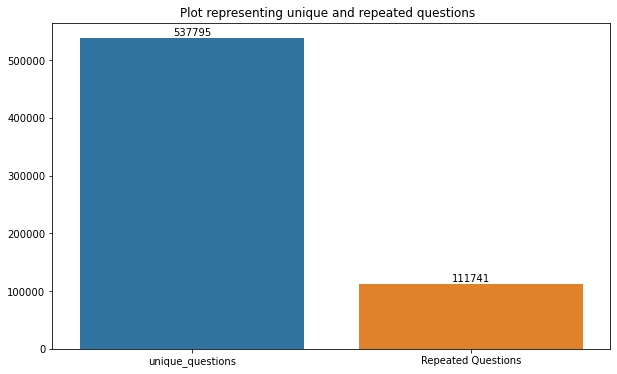

In [20]:
x = ["unique_questions" , "Repeated Questions"]
y =  [unique_qs , qs_morethan_onetime]



fig,ax = plt.subplots(figsize=(10, 6))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x,y, ax=ax)

for index, row in enumerate(y):
    ax.text(index,row+5000, row, color='black', ha="center")

plt.show()

Maximum number of times a single question is repeated: 157



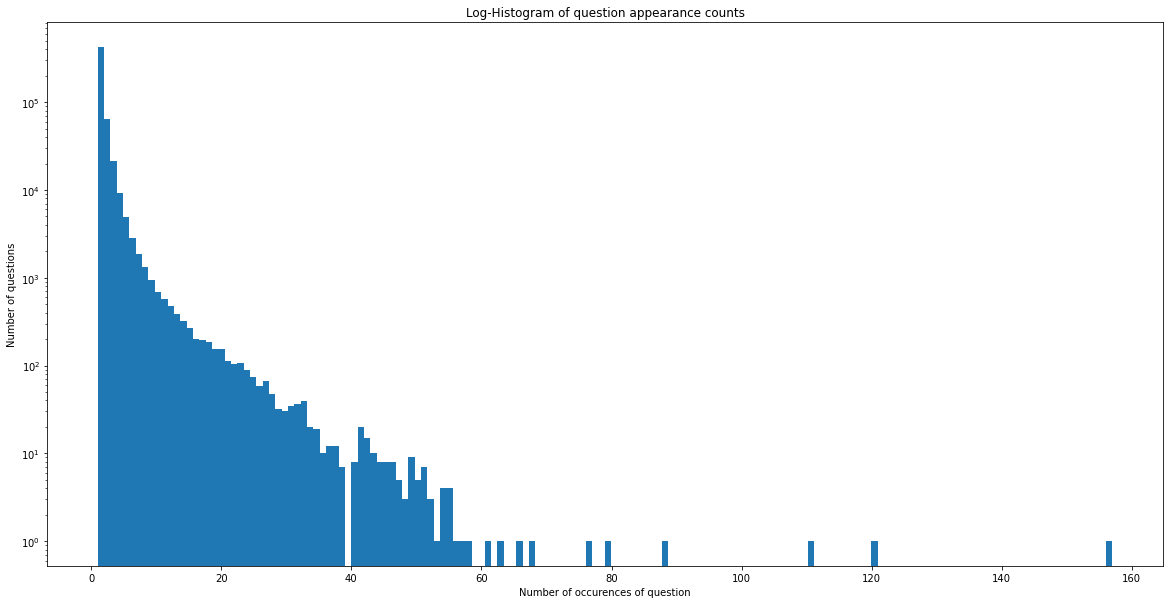

In [21]:
plt.figure(figsize=(20, 10))

plt.hist(qids.value_counts(), bins=160)

plt.yscale('log', nonposy='clip')

plt.title('Log-Histogram of question appearance counts')

plt.xlabel('Number of occurences of question')

plt.ylabel('Number of questions')

print ('Maximum number of times a single question is repeated: {}\n'.format(max(qids.value_counts()))) 

In [22]:
import nltk
from nltk import word_tokenize, ngrams
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

In [23]:
def get_unigram(question):
    return [word for word in word_tokenize(question.lower()) if word not in stop_words]

In [24]:
df_clean['unigram_ques1'] = df_clean['question1'].apply(lambda x : list(set(get_unigram(str(x)))))
df_clean['unigram_ques2'] = df_clean['question2'].apply(lambda x : list(set(get_unigram(str(x)))))

<ipython-input-24-1d5888ff064d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['unigram_ques1'] = df_clean['question1'].apply(lambda x : list(set(get_unigram(str(x)))))
<ipython-input-24-1d5888ff064d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['unigram_ques2'] = df_clean['question2'].apply(lambda x : list(set(get_unigram(str(x)))))


In [25]:
df_clean['freq_qid1'] = df_clean.groupby('qid1')['qid1'].transform('count') 
df_clean['freq_qid2'] = df_clean.groupby('qid2')['qid2'].transform('count')
df_clean['q1len'] = df_clean['question1'].str.len() 
df_clean['q2len'] = df_clean['question2'].str.len()
df_clean['q1_n_words'] = df_clean['question1'].apply(lambda row: len(row.split(" ")))
df_clean['q2_n_words'] = df_clean['question2'].apply(lambda row: len(row.split(" ")))

<ipython-input-25-9b488fc971cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['freq_qid1'] = df_clean.groupby('qid1')['qid1'].transform('count')
<ipython-input-25-9b488fc971cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['freq_qid2'] = df_clean.groupby('qid2')['qid2'].transform('count')
<ipython-input-25-9b488fc971cd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [26]:
df_clean.head()

,id,qid1,qid2,question1,question2,is_duplicate,unigram_ques1,unigram_ques2,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words
0,0,1,2,what is the step by step guide to invest in share market in india,what is the step by step guide to invest in share market,0,"[market, share, invest, india, guide, step]","[market, share, invest, guide, step]",1,1,66,57,15,13
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government stole the kohinoor koh i noor diamond back,0,"[diamond, koh, kohinoor, story, noor]","[diamond, would, koh, indian, stole, noor, happen, back, government, kohinoor]",4,1,49,86,11,16
2,2,5,6,how can i increase the speed of my internet nnection while using a vpn,how can internet speed be increased by hacking through dns,0,"[using, vpn, increase, speed, nnection, internet]","[speed, increased, dns, internet, hacking]",1,1,71,59,15,11
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math math is divided by,0,"[lonely, mentally, solve]","[remainder, divided, math, find]",1,1,49,48,12,10
4,4,9,10,which one dissolve in water quickly sugar salt methane and carbon di oxide,which fish would survive in salt water,0,"[oxide, methane, di, water, quickly, sugar, salt, one, dissolve, carbon]","[survive, would, water, fish, salt]",3,1,75,39,14,8


In [27]:
def get_common_unigram(row):
    return len(set(row['unigram_ques1']).intersection(set(row['unigram_ques2'])))

def get_common_word_ratio(row):
    return row['word_share'] / max(len(list(set((row['unigram_ques1'] + row['unigram_ques2'])))),1)

def normalized_word_Total(row):
    w1 = set(map(lambda word: str(word).lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: str(word).lower().strip(), row['question2'].split(" ")))    
    return 1.0 * (len(w1) + len(w2))


In [28]:
df_clean['word_share'] = df_clean.apply(lambda x : get_common_unigram(x), axis=1)

<ipython-input-28-5ecdf586f479>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['word_share'] = df_clean.apply(lambda x : get_common_unigram(x), axis=1)


In [29]:
df_clean.head()

,id,qid1,qid2,question1,question2,is_duplicate,unigram_ques1,unigram_ques2,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_share
0,0,1,2,what is the step by step guide to invest in share market in india,what is the step by step guide to invest in share market,0,"[market, share, invest, india, guide, step]","[market, share, invest, guide, step]",1,1,66,57,15,13,5
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government stole the kohinoor koh i noor diamond back,0,"[diamond, koh, kohinoor, story, noor]","[diamond, would, koh, indian, stole, noor, happen, back, government, kohinoor]",4,1,49,86,11,16,4
2,2,5,6,how can i increase the speed of my internet nnection while using a vpn,how can internet speed be increased by hacking through dns,0,"[using, vpn, increase, speed, nnection, internet]","[speed, increased, dns, internet, hacking]",1,1,71,59,15,11,2
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math math is divided by,0,"[lonely, mentally, solve]","[remainder, divided, math, find]",1,1,49,48,12,10,0
4,4,9,10,which one dissolve in water quickly sugar salt methane and carbon di oxide,which fish would survive in salt water,0,"[oxide, methane, di, water, quickly, sugar, salt, one, dissolve, carbon]","[survive, would, water, fish, salt]",3,1,75,39,14,8,2


In [30]:
df_clean[(df_clean['unigram_ques1'].apply(lambda x: len(x)) ==0) | 
                                   (df_clean['unigram_ques2'].apply(lambda x: len(x)) ==0) ]\
[['question1', 'question2', 'unigram_ques1', 'unigram_ques2']].head(10)

,question1,question2,unigram_ques1,unigram_ques2
918,i am what should i do,what can i do when i am,[],[]
1510,if and what is,why can i not multiply fractions in python,[],"[fractions, python, multiply]"
7120,is it proper to use a mma after saying thank you,what is here and not there,"[saying, proper, mma, use, thank]",[]
7368,what is,what is,[],[]
7820,why and how is,why is equal to,[],[equal]
9581,how can i just be myself,how can i not be myself,[],[]
9746,what is,what is,[],[]
10614,if and what is,how do you solve base divided by base where is,[],"[base, divided, solve]"
13797,what is the most visited tourist attraction in africa,,"[tourist, africa, attraction, visited]",[]
17486,i am neither good at studies nor at anything else what should a loser like me do to transform self,if then why,"[neither, studies, transform, like, good, self, else, anything, loser]",[]


In [31]:
df_clean2 = df_clean.drop(df_clean[(df_clean['unigram_ques1'].apply(lambda x: len(x)) ==0) | 
                                   (df_clean['unigram_ques2'].apply(lambda x: len(x)) ==0) ].index, axis=0)

In [32]:
df_clean[(df_clean['unigram_ques1'].apply(lambda x: len(x)) ==0) | (df_clean['unigram_ques2'].apply(lambda x: len(x)) ==0) ]

,id,qid1,qid2,question1,question2,is_duplicate,unigram_ques1,unigram_ques2,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_share
918,918,1831,1832,i am what should i do,what can i do when i am,1,[],[],1,1,22,24,7,8,0
1510,1510,3007,3008,if and what is,why can i not multiply fractions in python,0,[],"[fractions, python, multiply]",6,3,15,43,5,9,0
7120,7120,13921,13922,is it proper to use a mma after saying thank you,what is here and not there,0,"[saying, proper, mma, use, thank]",[],1,4,49,27,12,7,0
7368,7368,14396,14397,what is,what is,0,[],[],1,2,8,8,3,3,0
7820,7820,15264,15265,why and how is,why is equal to,1,[],[equal],4,6,15,16,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395737,395737,99189,92105,can we prove,how is,1,[prove],[],5,5,13,7,4,3,0
400030,400030,533354,533355,can i teach my self intermediate algebra in months,if than,0,"[months, algebra, self, intermediate, teach]",[],1,1,51,8,10,3,0
400269,400269,95567,533614,what is,if i what will i i do to i,0,[],[],2,1,8,27,3,10,0
401878,401878,182142,535325,what is is it one zero or infinity,what is,0,"[one, zero, infinity]",[],2,1,35,8,9,3,0


In [33]:
df_clean2['common_word_ratio'] = df_clean2.apply(lambda x: get_common_word_ratio(x), axis =1)

In [34]:
df_clean2.head()

,id,qid1,qid2,question1,question2,is_duplicate,unigram_ques1,unigram_ques2,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_share,common_word_ratio
0,0,1,2,what is the step by step guide to invest in share market in india,what is the step by step guide to invest in share market,0,"[market, share, invest, india, guide, step]","[market, share, invest, guide, step]",1,1,66,57,15,13,5,0.833333
1,1,3,4,what is the story of kohinoor koh i noor diamond,what would happen if the indian government stole the kohinoor koh i noor diamond back,0,"[diamond, koh, kohinoor, story, noor]","[diamond, would, koh, indian, stole, noor, happen, back, government, kohinoor]",4,1,49,86,11,16,4,0.363636
2,2,5,6,how can i increase the speed of my internet nnection while using a vpn,how can internet speed be increased by hacking through dns,0,"[using, vpn, increase, speed, nnection, internet]","[speed, increased, dns, internet, hacking]",1,1,71,59,15,11,2,0.222222
3,3,7,8,why am i mentally very lonely how can i solve it,find the remainder when math math is divided by,0,"[lonely, mentally, solve]","[remainder, divided, math, find]",1,1,49,48,12,10,0,0.000000
4,4,9,10,which one dissolve in water quickly sugar salt methane and carbon di oxide,which fish would survive in salt water,0,"[oxide, methane, di, water, quickly, sugar, salt, one, dissolve, carbon]","[survive, would, water, fish, salt]",3,1,75,39,14,8,2,0.153846


In [35]:
unigram_common_words = df_clean2['word_share'].value_counts()

In [36]:
print(df_clean2.word_share.min())
print(df_clean2.word_share.mean())
print(df_clean2.word_share.max())


print(len(df_clean2[df_clean2.word_share==0]))
print(len(df_clean2[df_clean2.word_share!=0]))


0
2.447967105328303
23
42399
361557


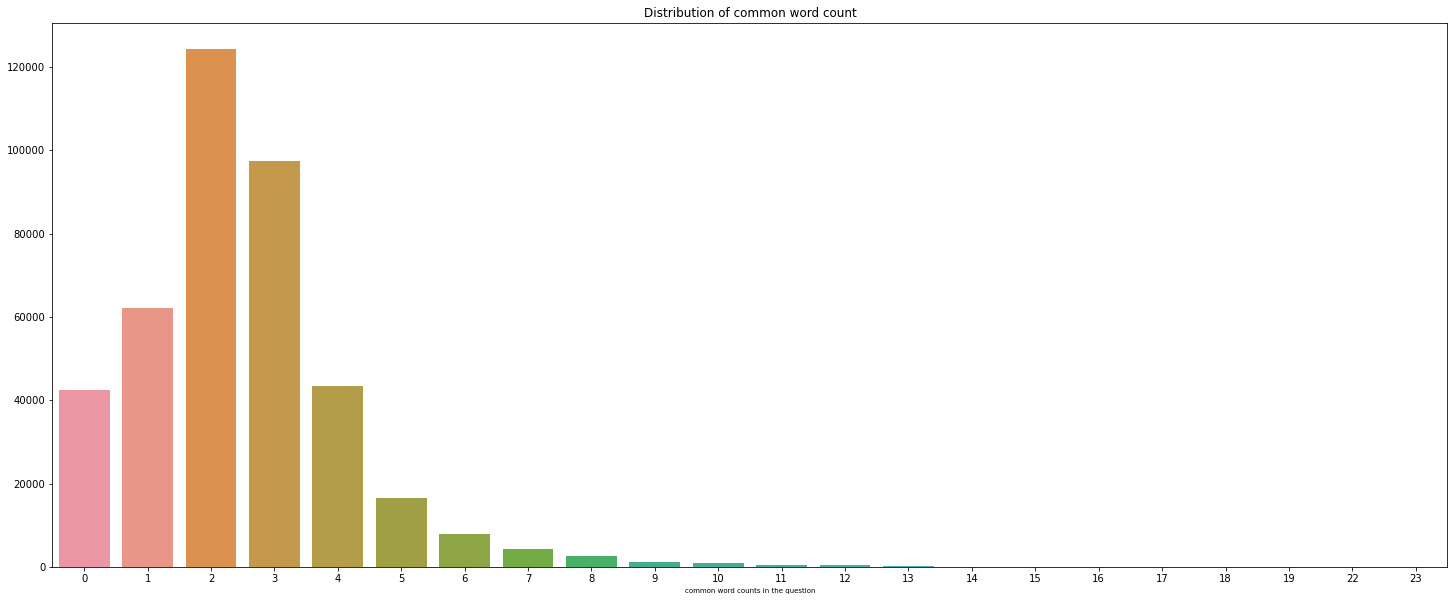

In [37]:
plt.subplots(figsize = (25,10))
sns.barplot(unigram_common_words.index, unigram_common_words.values)
plt.title('Distribution of common word count', fontsize = 12)
plt.xlabel('common word counts in the question', fontsize=7)
plt.show()

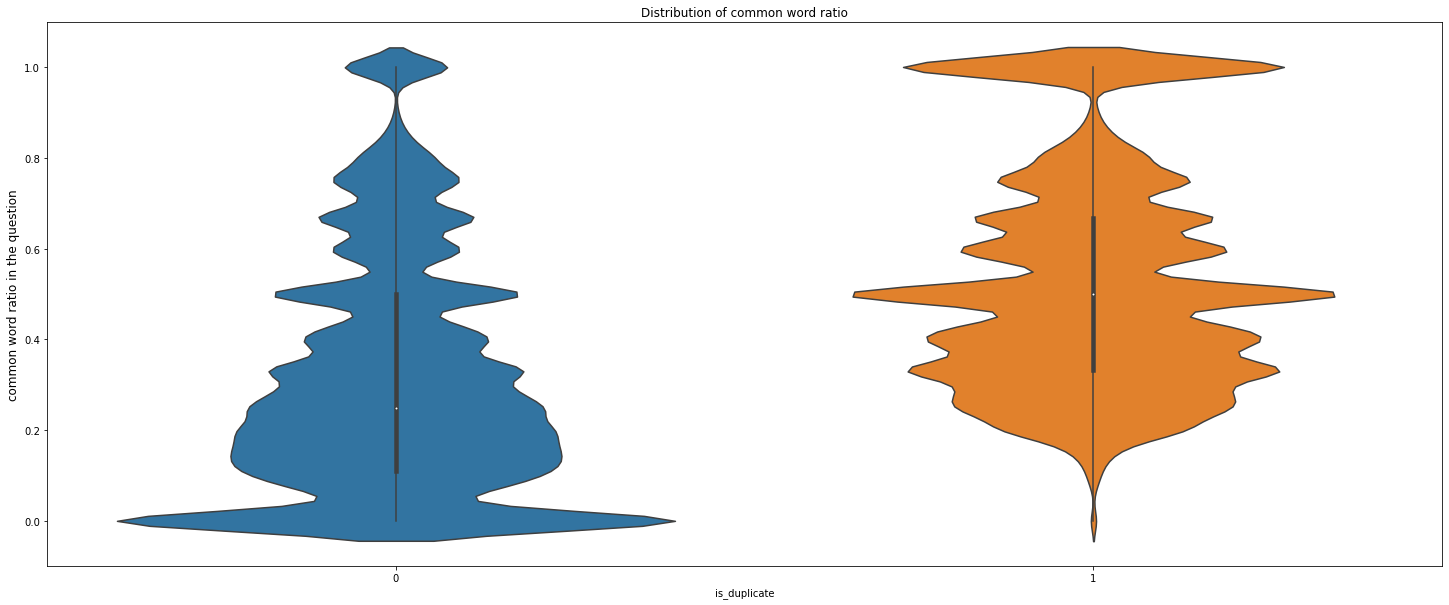

In [38]:
plt.subplots(figsize = (25,10))
sns.violinplot(x = 'is_duplicate', y = 'common_word_ratio', data = df_clean2)
plt.title('Distribution of common word ratio', fontsize = 12)
plt.ylabel('common word ratio in the question', fontsize=12)
plt.show()

In [39]:
df_clean2['words'] = (df_clean2['unigram_ques1'] + df_clean2['unigram_ques2']).apply(lambda x : list(set(x)))
vocab = list(set([a for b in df_clean2.words.tolist() for a in b]))
print(len(vocab))

78937


In [42]:
df_clean2.to_csv('../data/processed/clean_data.csv',  index= False)

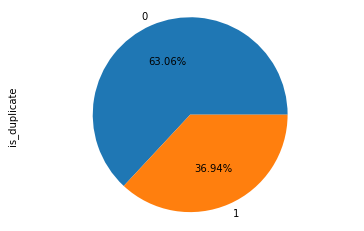

In [41]:
df_clean2.is_duplicate.value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.axis('equal')
plt.show()